In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [138]:
df=pd.read_csv('D:\InternPe\Heart_disease\heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.00,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.40,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.80,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.80,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.20,1,2,2,0


In [139]:
pd.set_option("display.float","{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


target
1    526
0    499
Name: count, dtype: int64


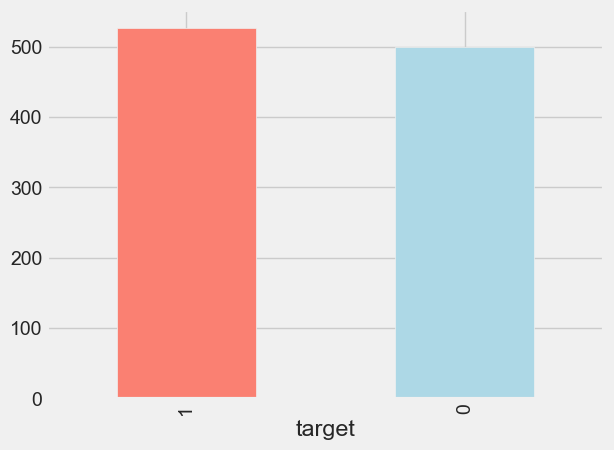

In [89]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
count_values = df['target'].value_counts()
print(count_values)

#### Here we can observe 526 people are diagnosed with Heart disease and 499 are not. Hence our classes are balanced.

In [119]:
columns_list=df.columns.tolist()
print(columns_list)
df.isna().sum()

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [140]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [134]:
print(categorical_val)
print(continous_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


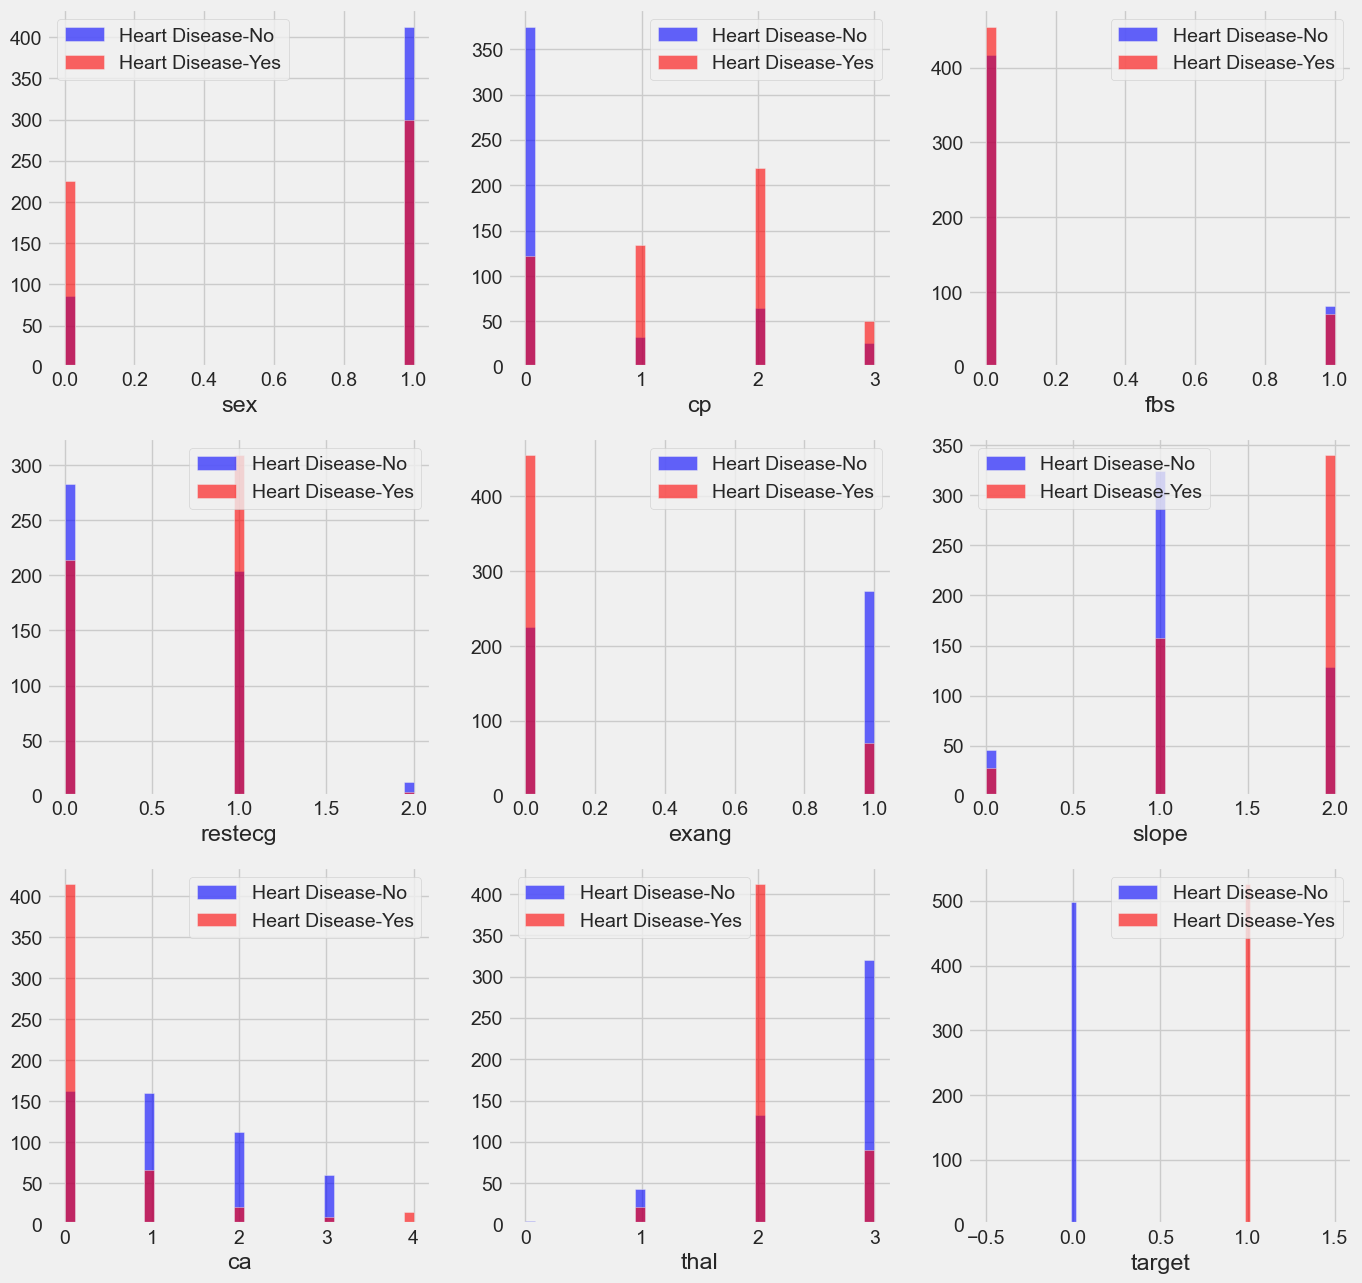

In [93]:
plt.figure(figsize=(15,15))

for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df["target"]==0][column].hist(bins=35,color='blue',label='Heart Disease-No',alpha=0.6)
    df[df["target"]==1][column].hist(bins=35,color='red',label='Heart Disease-Yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## Insights from above Plots:
- cp: People with Chest Pain values of 1,2,3 are more likely to get affected than people with value 0.
- restecg:Heart disease is more common in those with a value of 1 (abnormal heart rhythm, which can vary from minor symptoms to serious difficulties).
- exang (exercise-induced angina): individuals with a value of 1 (Yes) have a lower risk of heart disease than individuals with a value of 0 (No).
- slope (the slope of the ST segment of peak exercise): Individuals at risk of heart disease are those with a slope value of 2 (Downslopins:unhealthy heart) as opposed to those at risk of a slope value of 0 (Upsloping: optimal heart rate) or 1 (Flatsloping: minimal change).
- Ca {number of main vessels (0–3) stained by fluoroscopy}: individuals with a ca of 0 are more likely to develop heart problems since greater blood flow is better.
- thal {thalium stress result}: Heart disease is more common in those with a thal value of 2 (defect corrected: once was a defect but ok now).

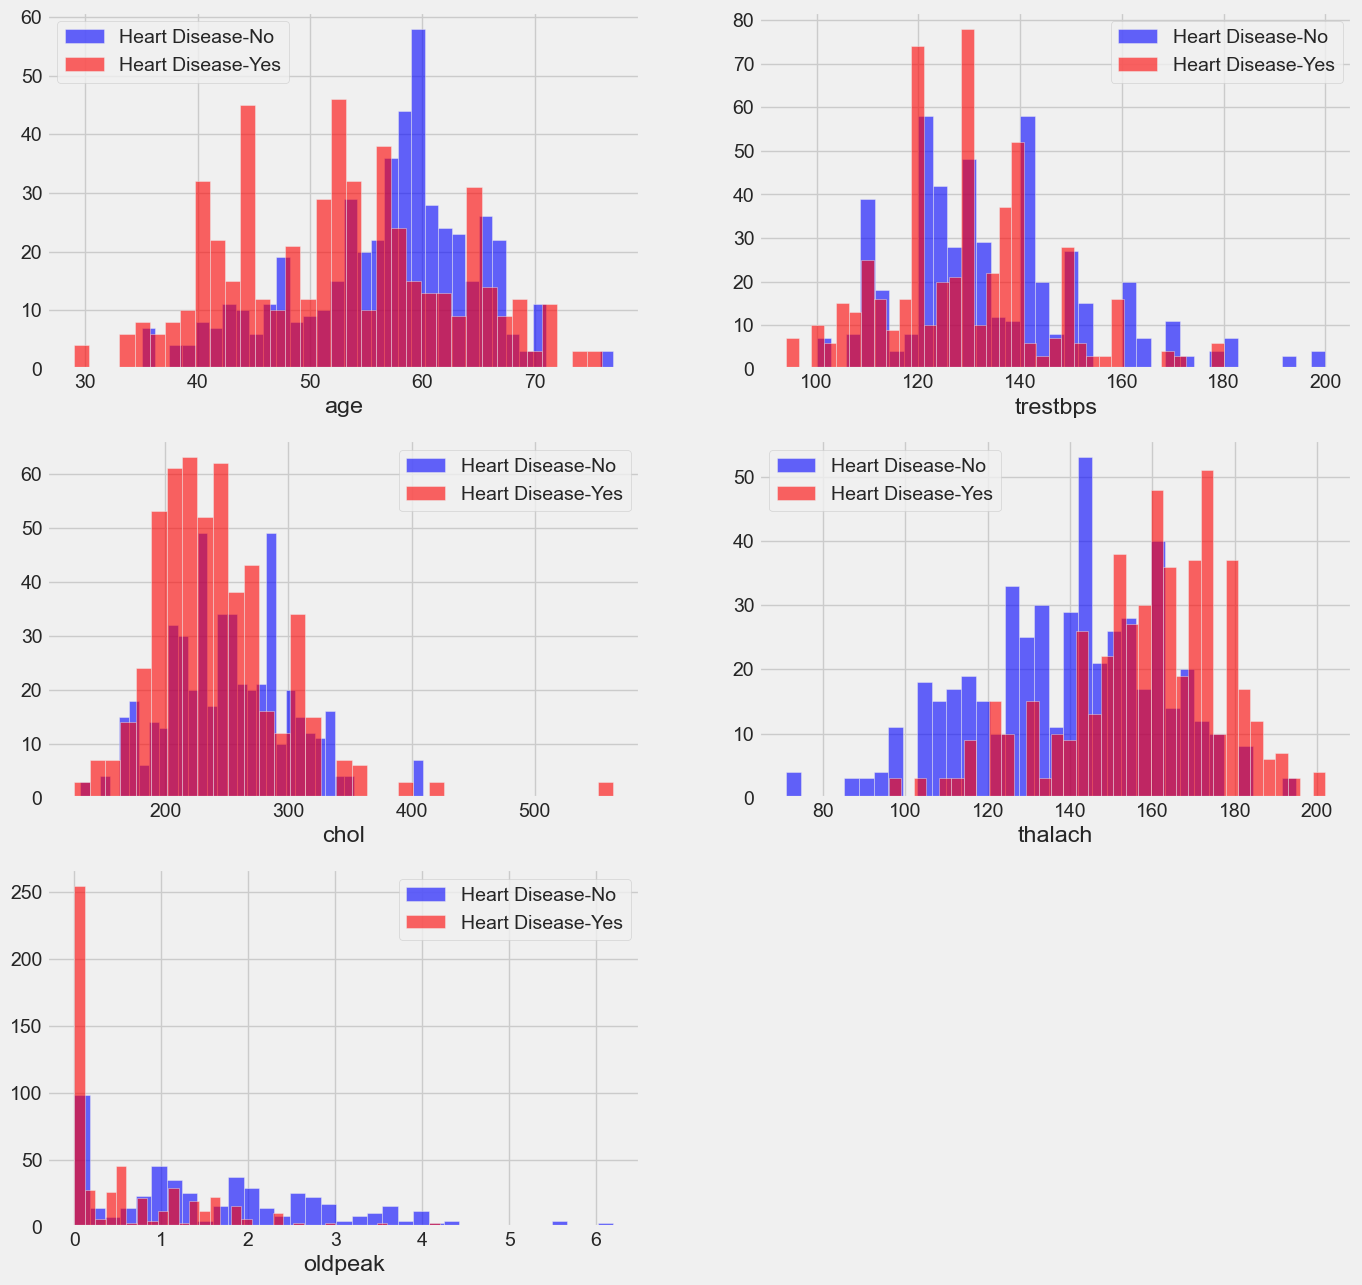

In [94]:
plt.figure(figsize=(15,15))

for i, column in enumerate(continous_val,1):
    plt.subplot(3,2,i)
    df[df["target"]==0][column].hist(bins=35,color='blue',label='Heart Disease-No',alpha=0.6)
    df[df["target"]==1][column].hist(bins=35,color='red',label='Heart Disease-Yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## Insights from the above Plots:
- trestbps: The resting Blood Pressure above 130 is a matter of concern
- chol: Cholesterol Level of above 200 is more likely to have heart disease.
- thalach: Maximum Heart Rate above 140 is of concern.
- oldpeak: Unhealthy heart tends to get more stressed during exercise.

## Correlation Matrix

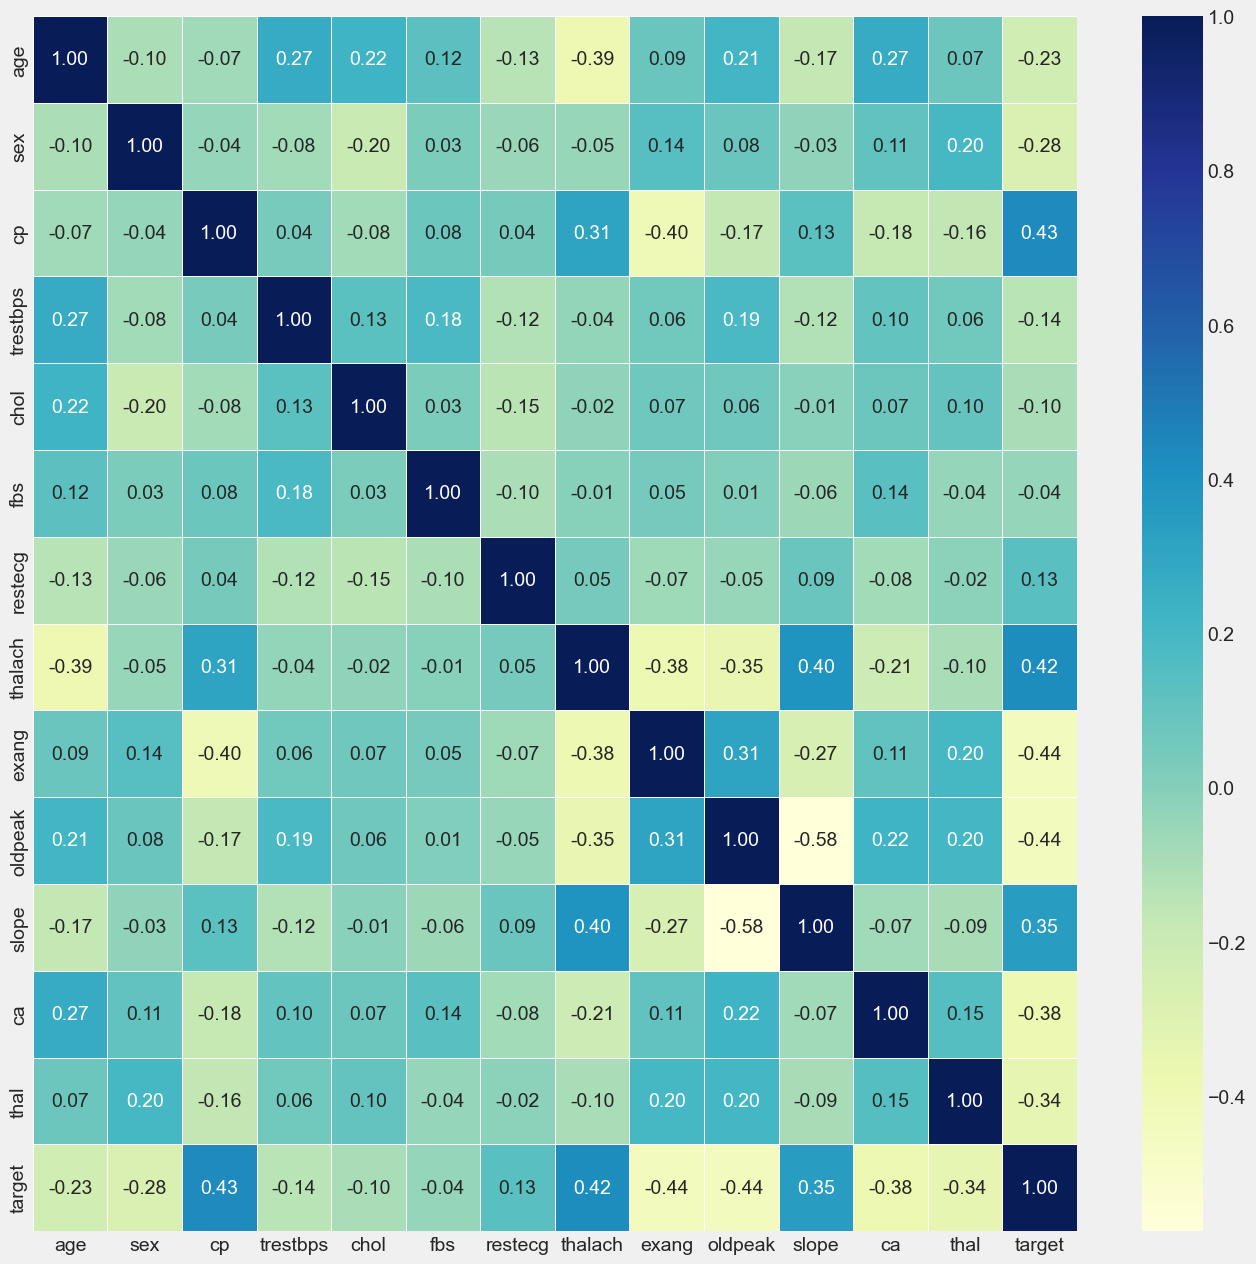

In [95]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu");

### Insights from the above plot:
- chol and fbs have least significant correlation with the target variable. trestbps and restecg have less significance.
- Rest all variables have greater significant correlation with the target variable.

## Data Processing
- We need to convert the categorical variables to dummy variables and scale all values before training.

In [141]:
categorical_val.remove('target')
dataset=pd.get_dummies(df, columns=categorical_val)

sc=StandardScaler()
col=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col]=sc.fit_transform(dataset[col])


## Logistic Regression

In [160]:
def score(clf, X_train,y_train, X_test, y_test, train=True):
    if train:
        pred=clf.predict(X_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result: \n=============================================")
        print(f"Accuracy Score: {accuracy_score(y_train,pred)*100:.2f}%")
        print("--------------------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("--------------------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")

    else:
        pred=clf.predict(X_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result: \n=============================================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print("--------------------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("--------------------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

### Splitting the data into 70% training and 30% testing.

In [161]:
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=12)

In [162]:
lr=LogisticRegression(solver='liblinear',fit_intercept=False)
lr.fit(X_train,y_train)

score(lr, X_train, y_train, X_test, y_test, train=True)
score(lr, X_train, y_train, X_test, y_test, train=False)

Train Result: 
Accuracy Score: 87.45%
--------------------------------------------
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.85      0.87       0.88          0.88
recall      0.83   0.92      0.87       0.87          0.87
f1-score    0.87   0.88      0.87       0.87          0.87
support   352.00 365.00      0.87     717.00        717.00
--------------------------------------------
Confusion Matrix:
[[293  59]
 [ 31 334]]

Test Result: 
Accuracy Score: 80.84%
--------------------------------------------
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision   0.82   0.80      0.81       0.81          0.81
recall      0.77   0.84      0.81       0.81          0.81
f1-score    0.79   0.82      0.81       0.81          0.81
support   147.00 161.00      0.81     308.00        308.00
--------------------------------------------
Confusion Matrix:
[[113  34]
 [ 25 136]]



In [163]:
test_score = accuracy_score(y_test, lr.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.45,80.84


In [164]:
def get_user_input():
    user_input = []
    for feature in categorical_val:
        user_input.append(float(input(f"Enter {feature}: ")))
    for feature in continous_val:
        user_input.append(float(input(f"Enter {feature}: ")))
    return user_input


In [170]:
user_input = get_user_input()
model_prediction = lr.predict([user_input])
if model_prediction[0] == 1:
    print("The model predicts that the person has heart disease.")
else:
    print("The model predicts that the person does not have heart disease.")

Enter sex:  1
Enter cp:  0
Enter fbs:  0
Enter restecg:  1
Enter exang:  0
Enter slope:  2
Enter ca:  2
Enter thal:  3
Enter age:  52
Enter trestbps:  125
Enter chol:  212
Enter thalach:  168
Enter oldpeak:  1


The model predicts that the person does not have heart disease.


C:\Users\91829\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [171]:
df['Predicted'] = lr.predict(X)
print(df[['target', 'Predicted']])

      target  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
...      ...        ...
1020       1          1
1021       0          0
1022       0          0
1023       1          1
1024       0          0

[1025 rows x 2 columns]


In [172]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted
1020,59,1,1,140,221,0,1,164,1,0.00,2,0,2,1,1
1021,60,1,0,125,258,0,0,141,1,2.80,1,1,3,0,0
1022,47,1,0,110,275,0,0,118,1,1.00,1,1,2,0,0
1023,50,0,0,110,254,0,0,159,0,0.00,2,0,2,1,1
1024,54,1,0,120,188,0,1,113,0,1.40,1,1,3,0,0
